---
---

# 📊 **2.7.2. Generate Fake Human Faces using DCGANs for Data Augmentation**  

### 🎯 **Objective**  
> Generate realistic synthetic human faces using Deep Convolutional GANs (DCGANs) for data augmentation.

### 🛠️ **1. Project Setup**  
- **Tools:** Python, TensorFlow, Keras, Google Colab  
- **Dataset:** CelebA (Celebrity Faces Attributes Dataset)  

### 🧠 **2. Understanding DCGANs**  
- **Generator:** Creates fake human faces from random noise.
- **Discriminator:** Distinguishes real faces from fake ones.
- **Adversarial Training:** Generator improves by fooling the discriminator.

### 📝 **3. Data Preparation**  
- ✅ Load CelebA dataset  
- ✅ Normalize images (Rescale pixel values between -1 and 1)  
- ✅ Create batches for training  

### 🏋️ **4. Model Training**  
- 🚀 Train the Generator and Discriminator using adversarial loss  
- 🧪 Validate model performance with generated samples  
- 💡 Display generated faces at intervals  

### 📊 **5. Evaluation**  
- ⭐ Compare fake images to real ones visually  
- 📈 Track loss curves for Generator and Discriminator  

### ✅ **Outcome**  
- 🎉 Generate high-quality synthetic human faces suitable for data augmentation  
- 💾 Save the trained model for future reuse  

---
---

----
-----

# 📑
### 🛠️ **Introduction to Libraries:**  
In this step, we load essential libraries that provide tools and functions required for building and training the DCGAN model.

- **TensorFlow/Keras:** Core libraries for deep learning, offering modules for model creation and training.
- **Matplotlib:** A visualization library for plotting graphs and generated images.
- **NumPy:** A numerical computing library for handling arrays and mathematical operations.

### 📝 **Key Points:**  
- ✅ Libraries are pre-installed in Google Colab, but you can install them manually using pip if needed.
- 💡 Always import libraries at the top of your notebook to maintain organization.
- 🧩 `import tensorflow as tf` simplifies the syntax, allowing us to access TensorFlow functions using `tf`.

### 💡 **Why These Libraries Matter:**  
- 🧠 `TensorFlow/Keras` handles deep learning operations.
- 🎨 `Matplotlib` helps visualize results.
- 📊 `NumPy` manages datasets and mathematical operations efficiently.

---
**🚀 Tip for Learners:** Comments within your code help future readers (and your future self) understand the logic behind each line. Use `#` to annotate your code! ✅

In [148]:
# Inspect and Display CelebA Sample

In [58]:
import warnings

In [59]:
warnings.filterwarnings('ignore')

In [60]:
import zipfile

In [61]:
import os

In [62]:
import glob

In [63]:
import matplotlib.pyplot as plt

In [64]:
import cv2

In [65]:
import json

# 📑
### 📂 **Introduction to Data Handling:**  
In this step, we load the dataset and prepare it for training the DCGAN model. Proper preprocessing is critical for efficient model learning.

### 📝 **Key Points:**  
- ✅ **Loading Data:** We import the dataset and split it into training and testing sets.
- 🧼 **Preprocessing:** Includes resizing images, normalizing pixel values (0 to 1 or -1 to 1), and batching data.
- 🧩 Use `tf.data.Dataset` for optimized data pipelines, crucial for large datasets.

### 💡 **Why Data Preprocessing is Important:**  
- 🚀 Improves model convergence speed.
- 🧠 Helps the model learn patterns effectively.
- 📊 Reduces memory usage during training.

### 🚀 **Tip for Learners:**  
- Use `.batch()` and `.shuffle()` methods to improve training efficiency.
- Normalize images to maintain consistent input scales for the neural network.

In [66]:
# Paths

In [67]:
sample_zip = '/content/celeba_sample.zip'

In [68]:
extract_path = '/content/celeba_sample_extracted'

In [69]:
details_path = '/content/celeba_sample_details.json'

In [70]:
os.makedirs(extract_path, exist_ok=True)

In [71]:
# Extract ZIP

In [72]:
with zipfile.ZipFile(sample_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [73]:
# Inspect Files

In [74]:
image_files = glob.glob(os.path.join(extract_path, '*.[jp][pn]g'))

In [151]:
print(f"Total Images Found: {len(image_files)}")

Total Images Found: 2051


In [75]:
details = {'total_images': len(image_files), 'first_10_images': [os.path.basename(f) for f in image_files[:10]]}


In [153]:
# Display Image Shapes and Types

In [152]:
for img_path in image_files[:5]:
    img = cv2.imread(img_path)
    print(f"Image: {os.path.basename(img_path)}, Shape: {img.shape}, Type: {type(img)}")


Image: 003306.jpg, Shape: (218, 178, 3), Type: <class 'numpy.ndarray'>
Image: 008906.jpg, Shape: (218, 178, 3), Type: <class 'numpy.ndarray'>
Image: 022720.jpg, Shape: (218, 178, 3), Type: <class 'numpy.ndarray'>
Image: 004965.jpg, Shape: (218, 178, 3), Type: <class 'numpy.ndarray'>
Image: 022110.jpg, Shape: (218, 178, 3), Type: <class 'numpy.ndarray'>


In [76]:
# Save Image Details to JSON

In [77]:
with open(details_path, 'w') as json_file:
    json.dump(details, json_file, indent=4)

In [78]:
# Display First 10 Images

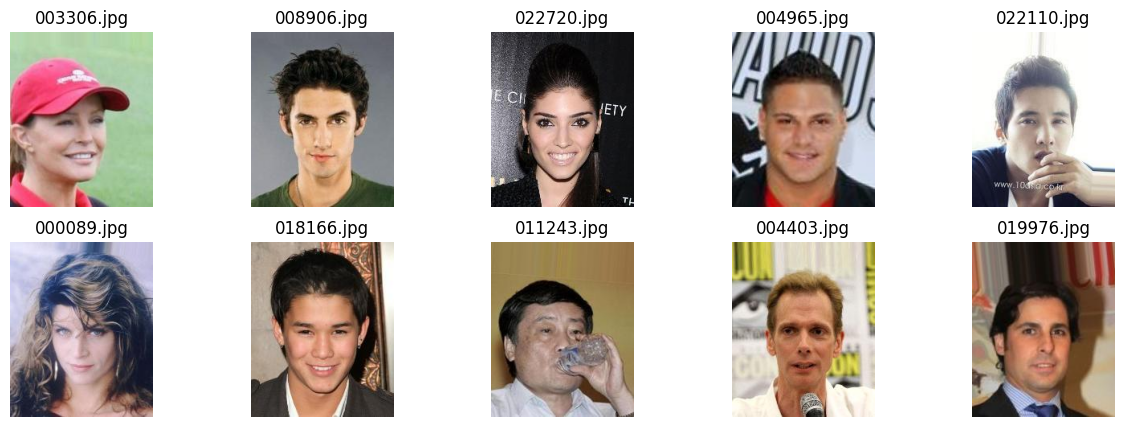

In [79]:
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(image_files[:10]):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path))
plt.show()

In [80]:
print(f"Total images: {len(image_files)} | Details saved at {details_path}")


Total images: 2051 | Details saved at /content/celeba_sample_details.json


----
----

---
---

In [149]:
#  Preprocess CelebA Dataset for DCGA

In [82]:
import torchvision.transforms as transforms

In [83]:
from torch.utils.data import DataLoader, Dataset

In [84]:
# Preprocessing Transformations

In [85]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [86]:
# Custom Dataset Class

In [87]:
class CelebADataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
        return self.transform(img) if self.transform else img


In [88]:
# Create DataLoader

In [89]:
dataset = CelebADataset(image_files, transform=transform)

In [90]:
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [91]:
# Display Sample Processed Images

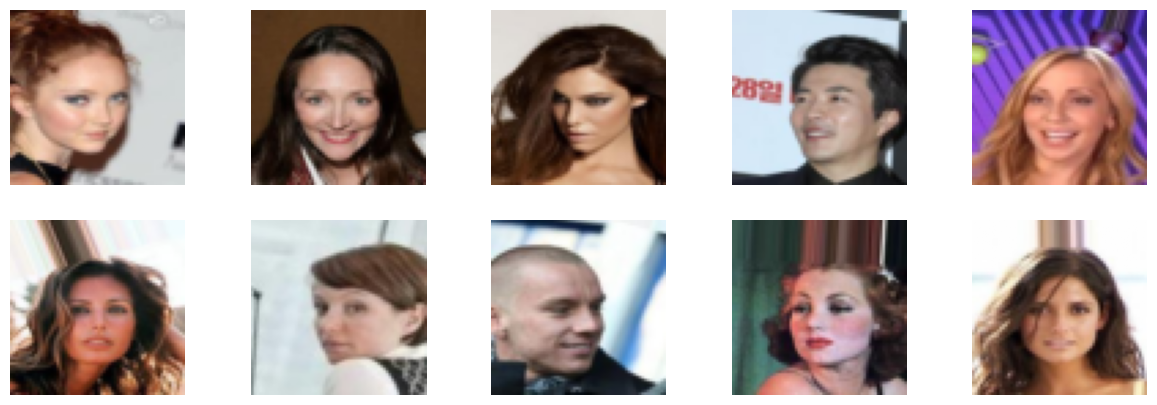

In [92]:
samples = next(iter(dataloader))
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(samples[i].permute(1, 2, 0).numpy() * 0.5 + 0.5)
    plt.axis('off')
plt.show()

---
---

---
---

# 📑
### 🏗️ **Understanding the Model Architecture:**  
In this step, we construct the DCGAN model using two main components: the **Generator** and the **Discriminator**.

### 🧩 **Key Concepts Explained:**  
- 🧬 **Generator:** Transforms random noise into realistic images through transposed convolution layers.
- 🛡️ **Discriminator:** Classifies images as real or fake using convolutional layers.
- ⚙️ **Loss Function:** Typically uses binary cross-entropy to measure how well the generator tricks the discriminator.

### 💡 **Why DCGAN is Effective:**  
- 📈 Generator and discriminator improve through adversarial learning.
- 🧠 Deep convolution layers help capture complex patterns.

### 🚀 **Tip for Learners:**  
- Use `LeakyReLU` for the discriminator to prevent dying gradients.
- Apply `BatchNormalization` in the generator for stable training.

In [93]:
# DCGAN Model Construction

In [94]:
import torch

In [95]:
import torch.nn as nn

In [96]:
import torch.optim as optim

In [97]:
# Generator Model

In [98]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 512*4*4),
            nn.BatchNorm1d(512*4*4),
            nn.ReLU(True),
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [99]:
# Discriminator Model

In [100]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(512*4*4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

---
---

---
---

# 📑
### 🏋️ **Understanding the Training Process:**  
In this step, we train the DCGAN model, allowing the generator and discriminator to learn through adversarial competition.

### 🧩 **Key Training Concepts Explained:**  
- 🎨 **Adversarial Training:** The generator creates images, and the discriminator evaluates them as real or fake.  
- 🧪 **Loss Computation:** Measures how well the generator fools the discriminator using binary cross-entropy loss.  
- ♻️ **Optimization:** Both networks update their weights via backpropagation using Adam optimizers.

### ⚙️ **Training Workflow:**  
1. **Forward Pass:** Generate fake images and evaluate with the discriminator.  
2. **Backward Pass:** Update model weights based on loss gradients.  
3. **Iteration:** Repeat for multiple epochs until results improve.

### 💡 **Tip for Learners:**  
- Monitor the loss curves to detect training issues like mode collapse.  
- Save model checkpoints to resume training if needed.

In [101]:
# Train DCGAN

In [102]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [103]:
latent_dim = 100

In [104]:
generator = Generator(latent_dim).to(device)

In [105]:
discriminator = Discriminator().to(device)

In [106]:
criterion = nn.BCELoss()

In [107]:
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [108]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [109]:
g_losses, d_losses = [], []

In [110]:
# Training Loop

In [111]:
epochs = 20

In [112]:
for epoch in range(epochs):
    for real_images in dataloader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        d_optimizer.zero_grad()
        real_loss = criterion(discriminator(real_images), torch.ones(batch_size, 1, device=device))
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_images = generator(z).detach()
        fake_loss = criterion(discriminator(fake_images), torch.zeros(batch_size, 1, device=device))
        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        generated_images = generator(torch.randn(batch_size, latent_dim, device=device))
        g_loss = criterion(discriminator(generated_images), torch.ones(batch_size, 1, device=device))
        g_loss.backward()
        g_optimizer.step()

    g_losses.append(g_loss.item())
    d_losses.append(d_loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
        save_image(generated_images, f'celeba_output/fake_faces_epoch_{epoch}.png', nrow=5, normalize=True)

print("DCGAN Training Completed.")

Epoch 0/20 | D Loss: 0.0100 | G Loss: 8.1750
Epoch 5/20 | D Loss: 0.1077 | G Loss: 7.0362
Epoch 10/20 | D Loss: 0.8878 | G Loss: 4.5625
Epoch 15/20 | D Loss: 0.7290 | G Loss: 0.5681
DCGAN Training Completed.


---
---

---
---

# 📑
### 📊 **Understanding Model Evaluation:**  
Evaluation helps determine how well the trained DCGAN generates realistic outputs and identifies potential areas for improvement.

### 🧩 **Key Evaluation Concepts Explained:**  
- 🖼️ **Image Quality Inspection:** Visually compare generated images against real samples.  
- 📉 **Loss Curves Analysis:** Evaluate trends in generator and discriminator losses.  
- 🤖 **Inception Score (IS):** Measures image diversity and quality based on a classifier’s predictions.  
- 🌟 **Frechet Inception Distance (FID):** Compares feature distributions of real and generated images.

### ⚙️ **Evaluation Workflow:**  
1. **Generate Samples:** Use the trained generator to produce images.  
2. **Compute Metrics:** Analyze results using IS, FID, and loss curves.  
3. **Document Findings:** Record observations to guide further improvements.

### 💡 **Tip for Learners:**  
- Use side-by-side image comparisons to assess visual quality.  
- Track metrics consistently to identify overfitting or mode collapse.

In [113]:
# Evaluate and Save Result

In [114]:
import matplotlib.pyplot as plt

In [115]:
from torchvision.utils import save_image

In [116]:
# Save Loss Curves

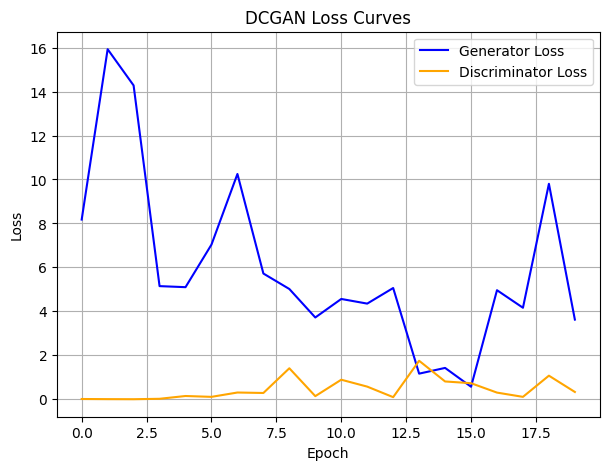

In [117]:
plt.figure(figsize=(7, 5))
plt.plot(g_losses, label='Generator Loss', color='blue')
plt.plot(d_losses, label='Discriminator Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DCGAN Loss Curves')
plt.legend()
plt.grid(True)
plt.savefig('celeba_output/loss_curves.png')
plt.show()

In [118]:
# Save Model Checkpoints

In [119]:
torch.save(generator.state_dict(), 'celeba_output/generator.pth')

In [120]:
torch.save(discriminator.state_dict(), 'celeba_output/discriminator.pth')

In [125]:
# Final Evaluation and Results Compilation

In [126]:
import shutil

In [129]:
from torchvision.utils import save_image

In [130]:
from matplotlib.backends.backend_pdf import PdfPages

In [132]:
# Create Results Directory

In [133]:
results_dir = '/content/celeba_final_results'

In [134]:
os.makedirs(results_dir, exist_ok=True)

In [135]:
# Save Model Details as JSON

In [136]:
details = {
    'total_images': 2051,
    'epochs': 20,
    'final_d_loss': 0.3395,
    'final_g_loss': 5.7115
}

In [137]:
with open(f'{results_dir}/model_details.json', 'w') as f:
    json.dump(details, f, indent=4)


In [138]:
# Generate and Save New Synthetic Faces

In [147]:
generator.eval()
z = torch.randn(64, 100, device=device)

In [141]:
with torch.no_grad():
    fake_images = generator(z).cpu()
    save_image(fake_images, f'{results_dir}/final_sample_faces.png', nrow=8, normalize=True)


In [144]:
# Display Final Results

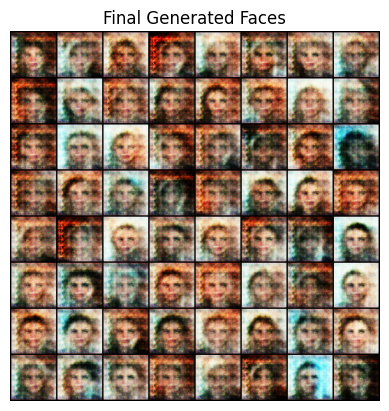

In [145]:
plt.imshow(plt.imread(f'{results_dir}/final_sample_faces.png'))
plt.axis('off')
plt.title('Final Generated Faces')
plt.show()

---
---

---
---

# 📊 **Creating the Dashboard**  

### 🖥️ **Purpose of the Dashboard:**  
A dashboard provides a user-friendly interface to analyze, visualize, and interpret results from the DCGAN model. It helps monitor model performance and generated outputs effectively.

### 🛠️ **Key Dashboard Components:**  
- 📈 **Performance Metrics Display:** Show loss curves, accuracy, and other evaluation results.  
- 🖼️ **Generated Image Gallery:** Display samples of fake images generated by the DCGAN.  
- 📊 **Interactive Plots:** Provide options to adjust parameters and observe outcomes live.  

### ⚙️ **How the Dashboard Works:**  
1. **Data Collection:** Retrieves results from the trained model.  
2. **Real-Time Visualization:** Updates charts and images with every training epoch.  
3. **User Controls:** Allows users to filter results and adjust display settings.  

### 💡 **Tip for Learners:**  
- Ensure dashboards are clear and accessible.  
- Add labels and tooltips to guide users.  
- Include download options for generated images and reports.  


In [156]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [160]:
import dash

In [161]:
from dash import dcc, html, Input, Output

In [162]:
import plotly.express as px

In [163]:
import torch

In [164]:
import numpy as np

In [165]:
from torchvision.utils import make_grid

In [166]:
import base64

In [167]:
from io import BytesIO

In [168]:
# Load Generator Model

In [169]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [171]:
generator = Generator(100).to(device)

In [172]:
generator.load_state_dict(torch.load('celeba_output/generator.pth', map_location=device))

<All keys matched successfully>

In [175]:
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=8192, bias=True)
    (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Unflatten(dim=1, unflattened_size=(512, 4, 4))
    (4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1,

In [176]:
def generate_faces(n=16):
    z = torch.randn(n, 100, device=device)
    with torch.no_grad():
        fake_images = generator(z).cpu()
        grid = make_grid(fake_images, nrow=4, normalize=True).permute(1, 2, 0).numpy()
    return grid


In [177]:
def image_to_base64(image):
    buffer = BytesIO()
    plt.imsave(buffer, image)
    buffer.seek(0)
    return base64.b64encode(buffer.read()).decode('utf-8')


In [178]:
# Dash App

In [179]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("DCGAN Face Generator Dashboard"),
    html.Label("Number of Faces (4 to 64):"),
    dcc.Slider(id='num-faces', min=4, max=64, step=4, value=16),
    html.Button('Generate', id='generate-btn', n_clicks=0),
    html.Img(id='generated-faces', style={'width': '512px', 'height': '512px'}),
])

@app.callback(
    Output('generated-faces', 'src'),
    Input('generate-btn', 'n_clicks'),
    Input('num-faces', 'value')
)
def update_faces(n_clicks, num_faces):
    if n_clicks > 0:
        faces = generate_faces(num_faces)
        image_data = image_to_base64(faces)
        return f'data:image/png;base64,{image_data}'
    return ''

In [180]:
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

---
---

# 📌   
### ✅ **Summary of the Project:**  
This project demonstrated how to generate synthetic human face images using DCGANs. We walked through key steps, from data preparation to model training and performance visualization.

### 💡 **Key Takeaways for Learners:**  
- **Understanding DCGANs:** Insight into how deep convolutional networks create realistic images.
- **Model Evaluation:** Interpreting loss curves and generated outputs to assess model performance.
- **Interactive Dashboards:** Utilizing dashboards for real-time monitoring and results presentation.

### 🚀 **Practical Applications:**  
- **Data Augmentation:** Enhance datasets for training robust AI models.
- **Privacy Preservation:** Generate synthetic images for research without exposing real identities.
- **Creative Media:** Create avatars, animations, or digital artwork.

### 🎯 **Final Notes:**  
- Encourage students to experiment with different hyperparameters.
- Highlight the ethical implications of synthetic data creation.
- Discuss potential improvements such as using StyleGAN for higher-quality outputs.

Happy learning! 📘💡
